In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [16]:
import matplotlib.pyplot as plt
def trading (forecast,actual):
#execute the trading from the result of forecast and actual energy production
#forecast: an 1D array of forecast values (Unit:kWh)
#actual: an 1D array of actual values (Unit:kWh)
  
    #initial budget
    budget=1e9
    #counters initialize: short falling and panalty counter
    SFcount=0;
    Pcount=0;
    cashFlow=[1e9]
    
    for f,a in zip(forecast,actual):
        if f <= a:
            budget += f*10
        elif f > a:#short falling
            budget += a*10
            #calculate cost of spot price energy
            spotP = 20*(f-a)
            SFcount += 1
            if budget >= spotP:
                budget -= 20*(f-a)
            else:
                #receive penalty from the government
                if budget>0:
                    #buy from grid if budget not equal to 0
                    spotP-=budget
                    budget=0
                #fine =5* spotP
                budget -= 5*spotP
                Pcount+=1
        cashFlow.append(budget)
    timeStep= list(range(0, len(cashFlow)))
    #Reporting
    plt.plot(timeStep,cashFlow)
    plt.show()
    print ("resultant budget: ",budget)
    print ("net profit: ",budget-1e9)
    print ("number of short falling: ",SFcount )
    print ("number of panalty: ",Pcount )
    print ("Cash flow: ",cashFlow )

Testing

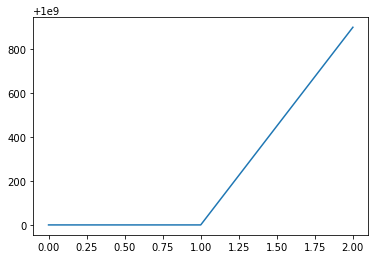

resultant budget:  1000000900.0
net profit:  900.0
number of short falling:  1
number of panalty:  0
Cash flow:  [1000000000.0, 1000000000.0, 1000000900.0]


In [17]:
forecast=(0,105)
actual=(0,100)
trading(forecast,actual)

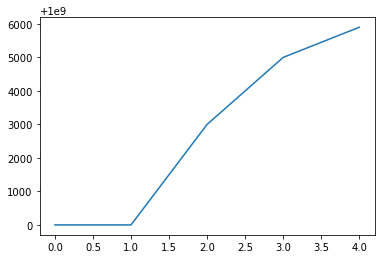

resultant budget:  1000005900.0
net profit:  5900.0
number of short falling:  1
number of panalty:  0
Cash flow:  [1000000000.0, 1000000000.0, 1000003000.0, 1000005000.0, 1000005900.0]


In [18]:
forecast=(0,300,200,105)
actual=(0,300,300,100)
trading(forecast,actual)